In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science', "no-latex"])


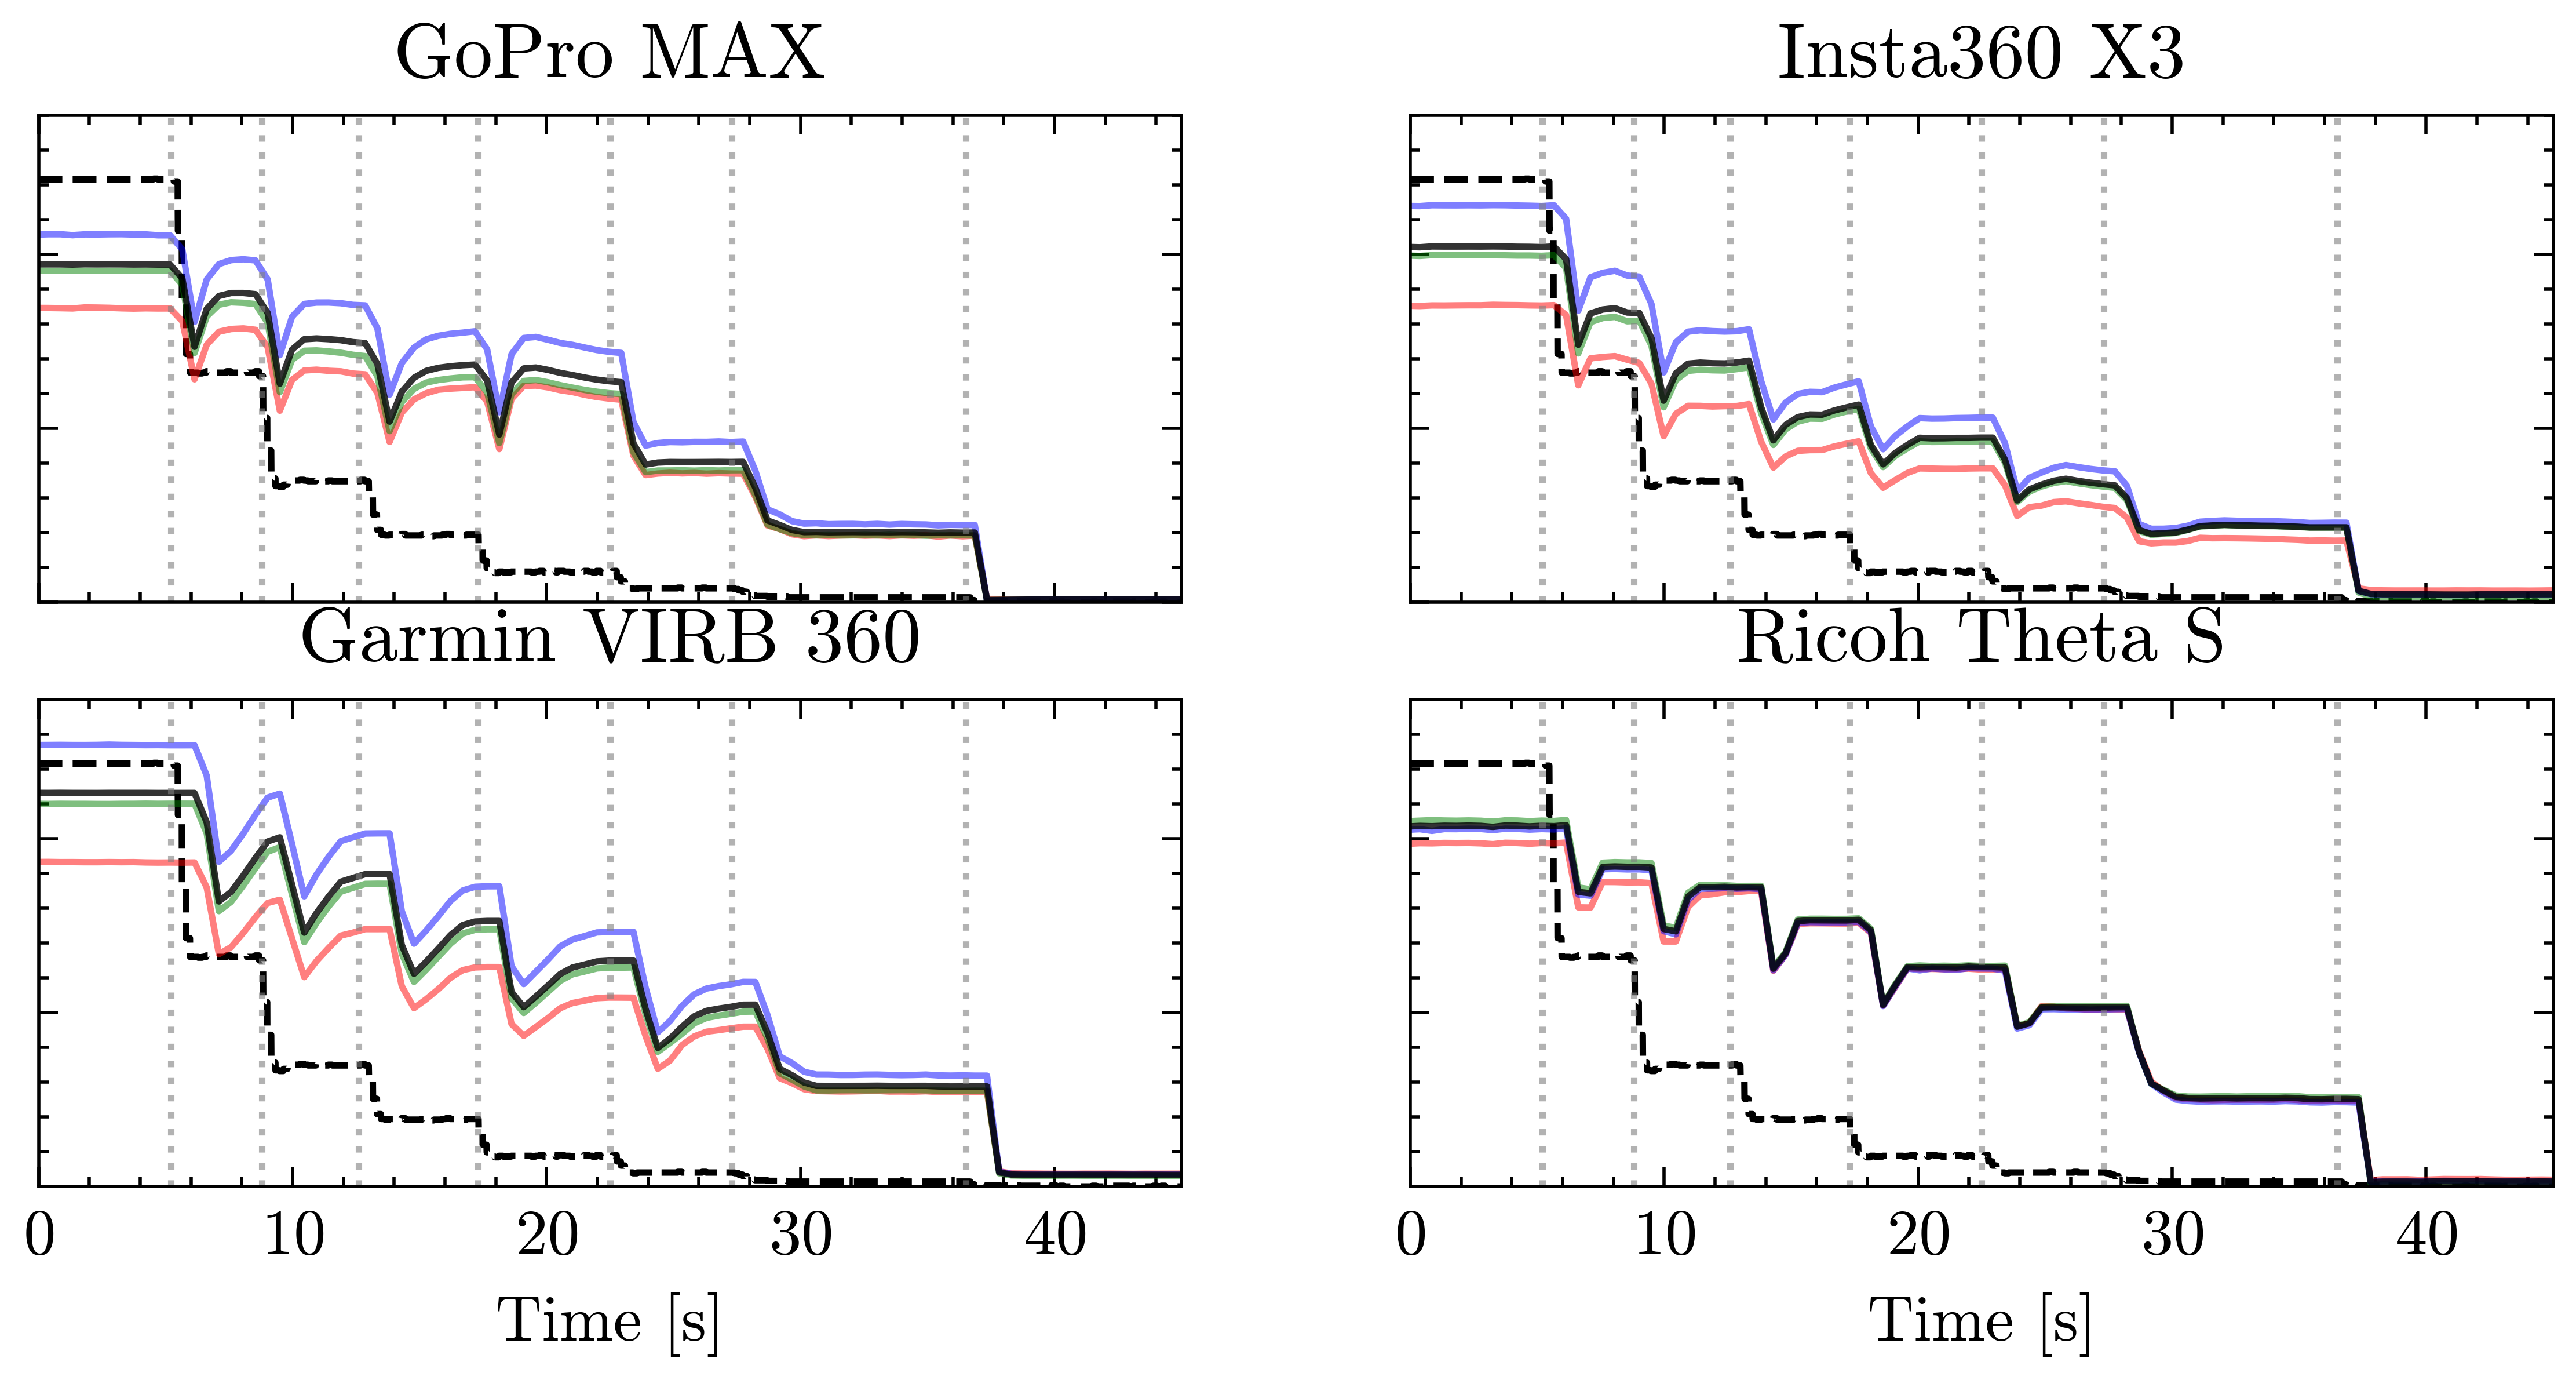

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(7, 3), dpi=800)

# read smartphone data
mobile_data = './data/2023-12-18T14.54.21.csv'
df = pd.read_csv(mobile_data, header=1,  delimiter=';',decimal=',', low_memory=False)
df = df[['time', 'I', 'Gain']]
# Replacing n-dash with hyphen
df=df.replace(to_replace='−', value='-',regex=True)
# Replacing comma with dot
df=df.replace(to_replace=',', value='.',regex=True)
# Replacing NAN with zeros
df=df.replace(to_replace='∞', value='0',regex=True)
df=df.astype(float)

# read camera data
camera_data = {
    "gopro": {"fps": 25, "name": "GoPro MAX"},
    "insta": {"fps": 29.97, "name": "Insta360 X3"},
    "garmin": {"fps": 25, "name": "Garmin VIRB 360"},
    "ricoh": {"fps": 29.97, "name": "Ricoh Theta S"},
}
for camera in camera_data:
    camera_data[camera]["rgb"] = np.load(f"{camera}_rgb.npy")
    camera_data[camera]["brightness"] = np.load(f"{camera}_brightness.npy")

# plots
scale = 5
time_offset = 105
for i, camera in enumerate(camera_data):
    x, y = i//2, i%2
    ax_now = ax[x, y]
    ax_now.plot(df['time'] - time_offset, df['I'], label='light intensity', color='black', linestyle="--")
    time = np.arange(100) * 48 / 100 + 104.9 - time_offset
    for j, color in enumerate(["red", "green", "blue"]):
        ax_now.plot(time, scale * camera_data[camera]["rgb"][:100, j], label=f"{camera} {color}", color=color, alpha=0.5)
    ax_now.plot(time, scale * camera_data[camera]["brightness"][:100], label=f"{camera} brightness", color="black", alpha=0.8)
    for v_pos in [110.2, 113.8, 117.6, 122.3, 127.5, 132.3, 141.5]:
        ax_now.vlines(v_pos-time_offset, 0, 700, color="grey", linestyle="dotted", alpha=0.6)
    ax_now.set_title(camera_data[camera]["name"])
    ax_now.set(xlim=(105-time_offset, 150-time_offset), ylim=(0, 700))
    if i not in [2, 3]:
        ax_now.set_xticklabels([])
    if i in [2, 3]:
        ax_now.set_xlabel("Time [s]")
    ax_now.set_yticklabels([])
    # break


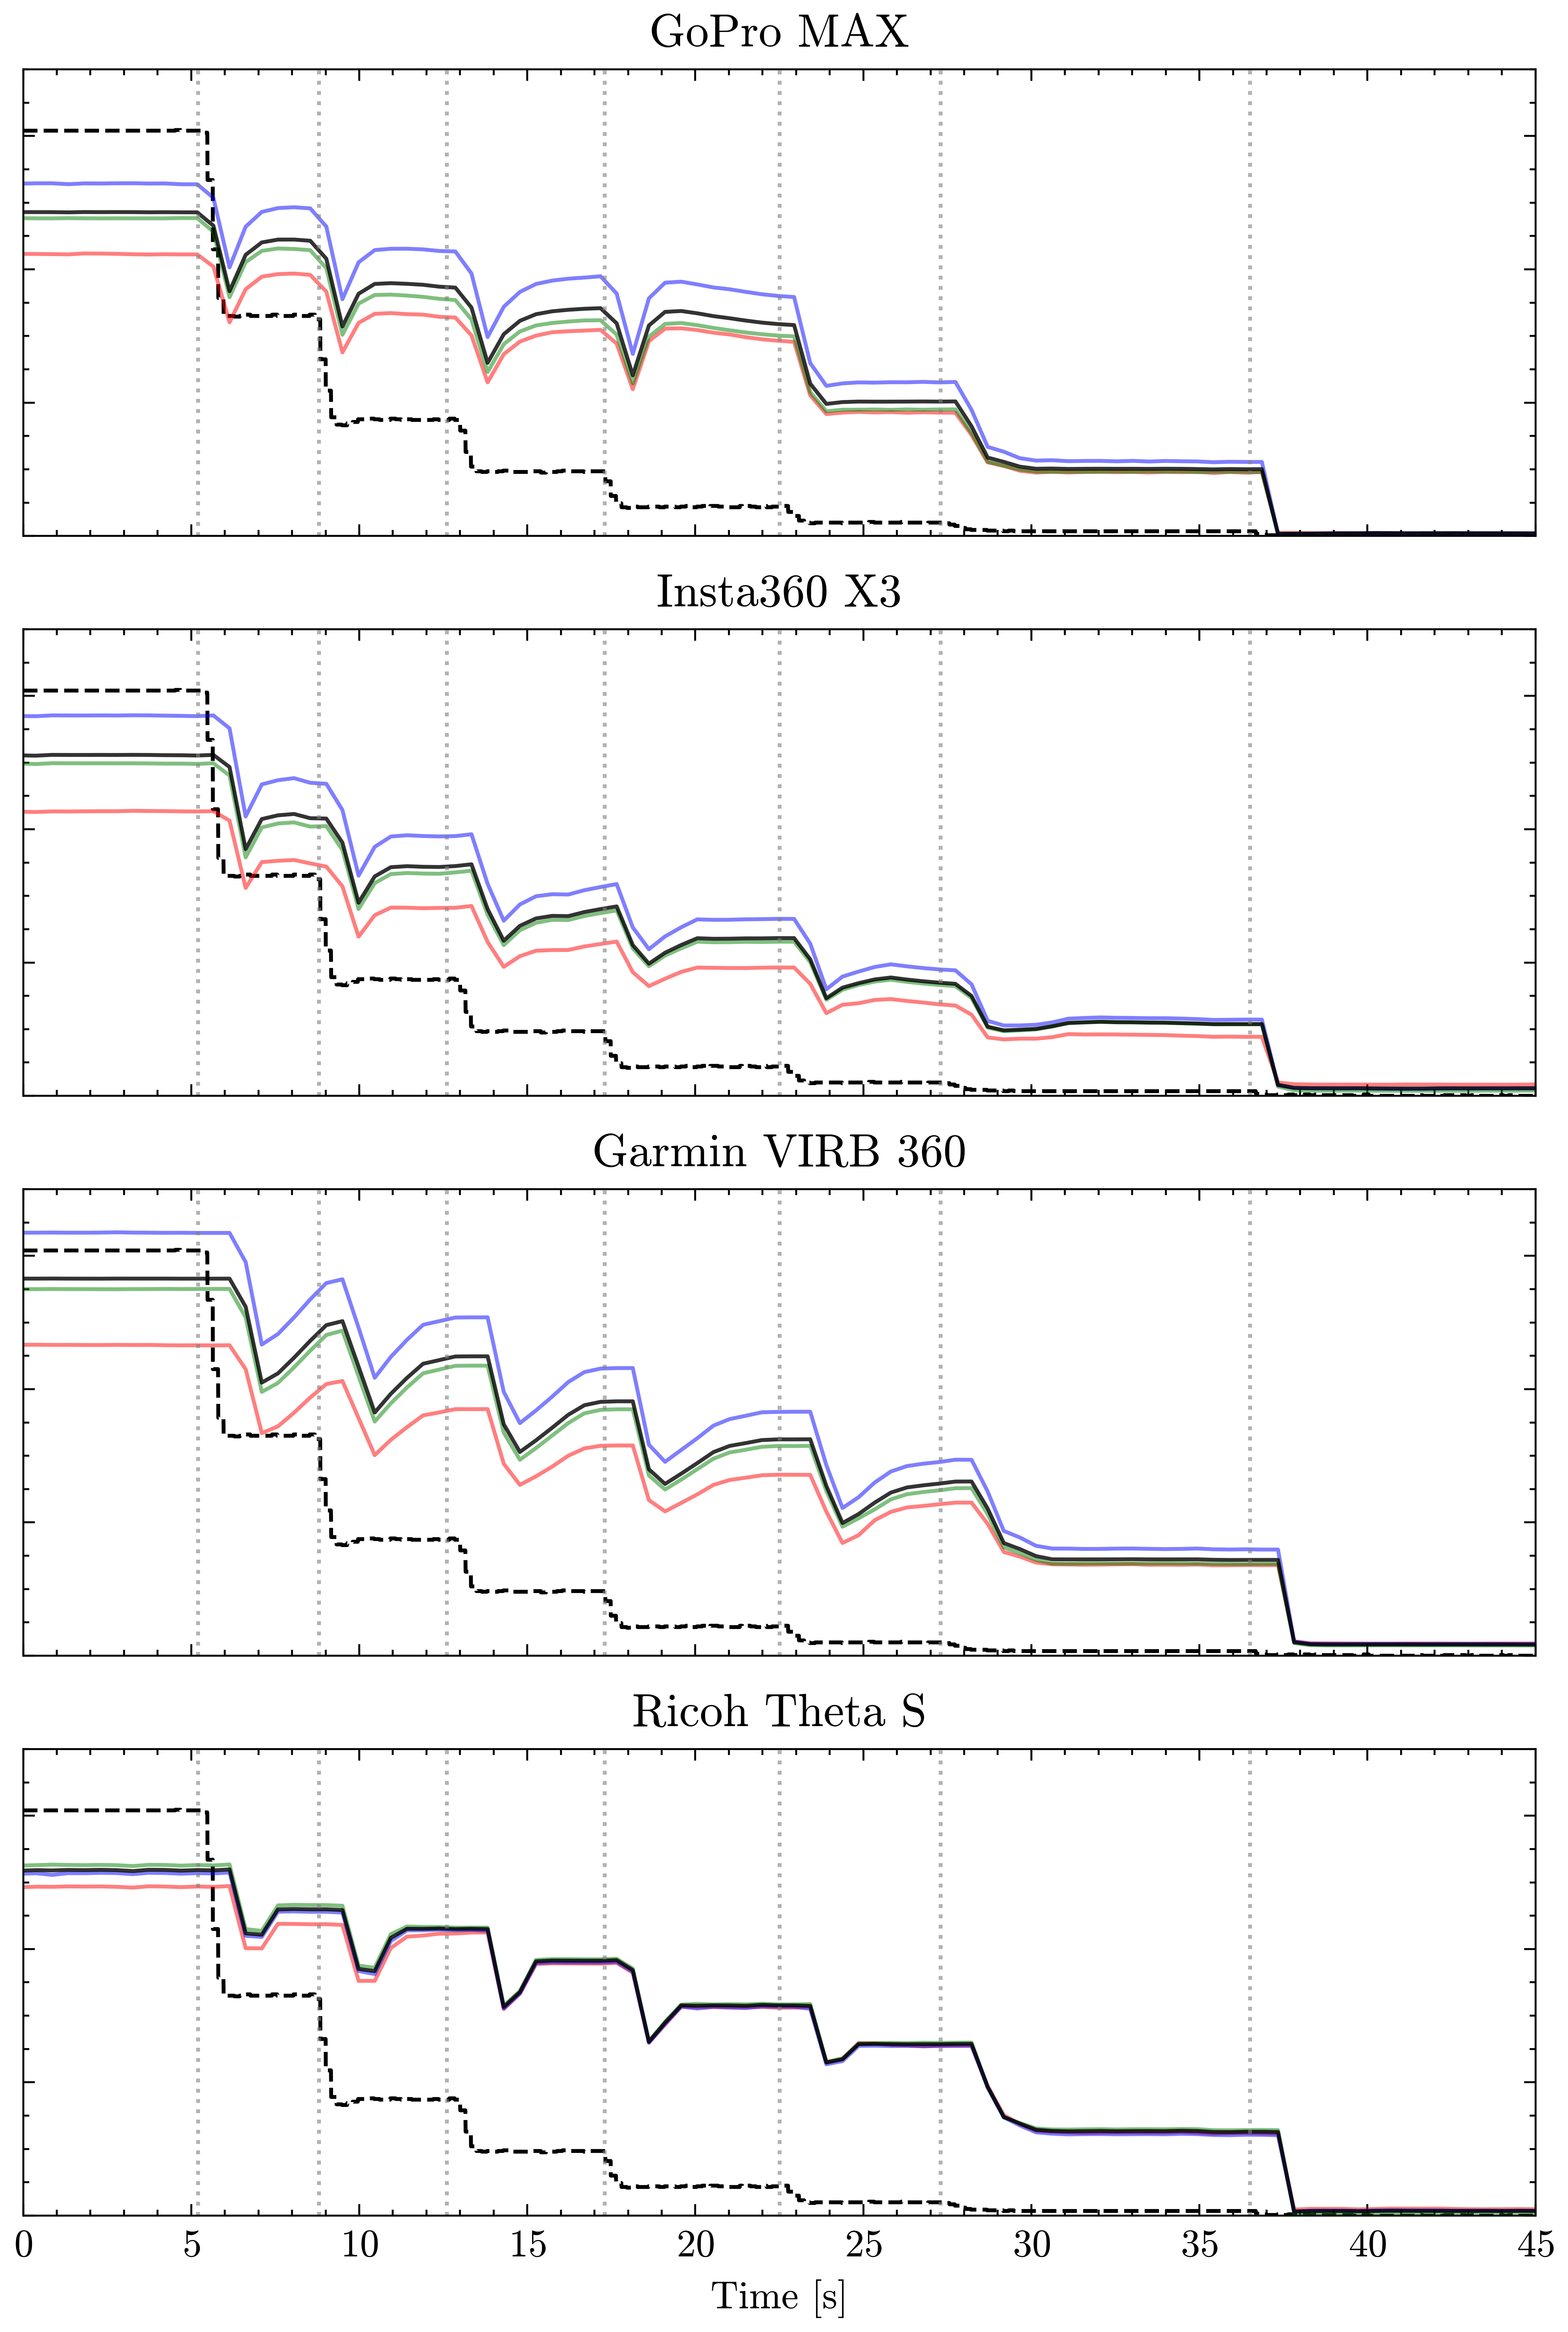

In [6]:
# single column

fig, ax = plt.subplots(4, 1, figsize=(7, 10), dpi=800)

# read smartphone data
mobile_data = './data/2023-12-18T14.54.21.csv'
df = pd.read_csv(mobile_data, header=1,  delimiter=';',decimal=',', low_memory=False)
df = df[['time', 'I', 'Gain']]
# Replacing n-dash with hyphen
df=df.replace(to_replace='−', value='-',regex=True)
# Replacing comma with dot
df=df.replace(to_replace=',', value='.',regex=True)
# Replacing NAN with zeros
df=df.replace(to_replace='∞', value='0',regex=True)
df=df.astype(float)

# read camera data
camera_data = {
    "gopro": {"fps": 25, "name": "GoPro MAX"},
    "insta": {"fps": 29.97, "name": "Insta360 X3"},
    "garmin": {"fps": 25, "name": "Garmin VIRB 360"},
    "ricoh": {"fps": 29.97, "name": "Ricoh Theta S"},
}
for camera in camera_data:
    camera_data[camera]["rgb"] = np.load(f"{camera}_rgb.npy")
    camera_data[camera]["brightness"] = np.load(f"{camera}_brightness.npy")

# plots
scale = 5
time_offset = 105
for i, camera in enumerate(camera_data):
    ax_now = ax[i]
    ax_now.plot(df['time'] - time_offset, df['I'], label='light intensity', color='black', linestyle="--")
    time = np.arange(100) * 48 / 100 + 104.9 - time_offset
    for j, color in enumerate(["red", "green", "blue"]):
        ax_now.plot(time, scale * camera_data[camera]["rgb"][:100, j], label=f"{camera} {color}", color=color, alpha=0.5)
    ax_now.plot(time, scale * camera_data[camera]["brightness"][:100], label=f"{camera} brightness", color="black", alpha=0.8)
    for v_pos in [110.2, 113.8, 117.6, 122.3, 127.5, 132.3, 141.5]:
        ax_now.vlines(v_pos-time_offset, 0, 700, color="grey", linestyle="dotted", alpha=0.6)
    ax_now.set_title(camera_data[camera]["name"])
    ax_now.set(xlim=(105-time_offset, 150-time_offset), ylim=(0, 700))
    if i != 3:
        ax_now.set_xticklabels([])
    if i == 3:
        ax_now.set_xlabel("Time [s]")
    ax_now.set_yticklabels([])
    # break


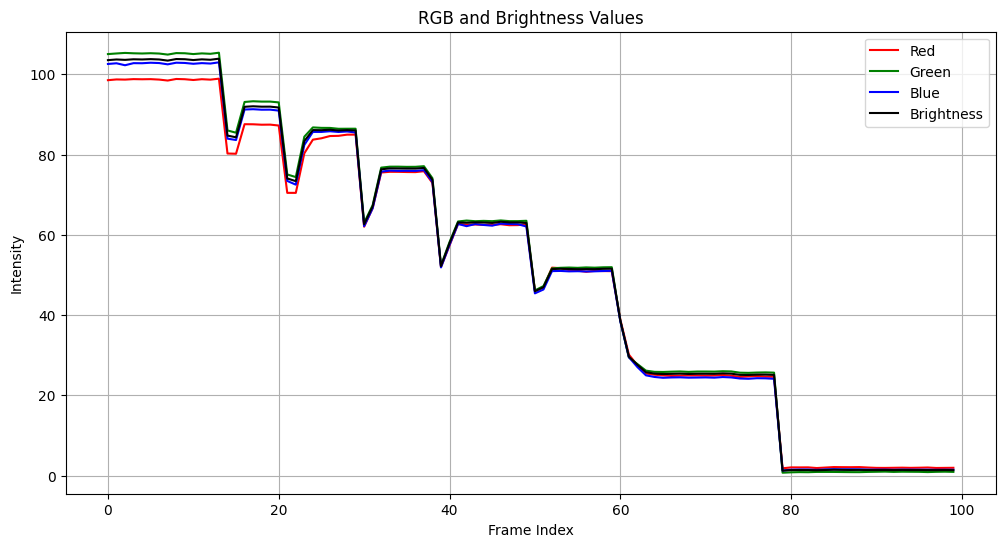

In [55]:
# Function to process frames and extract RGB values and brightness
def process_video(video_path, num_frames):
    video = cv2.VideoCapture('./data/light_intensity/ricoh.mp4')
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_indices = np.linspace(0, total_frames - 1, num_frames, dtype=int)
    
    rgb_values = []
    brightness_values = []
    
    for idx in frames_indices:
        video.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = video.read()
        if not ret:
            continue
        
        # Convert frame to grayscale for brightness calculation
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Calculate average brightness
        brightness = np.mean(gray_frame)
        brightness_values.append(brightness)
        
        # Calculate RGB values
        r, g, b = frame[:,:,0], frame[:,:,1], frame[:,:,2]
        avg_r = np.mean(r)
        avg_g = np.mean(g)
        avg_b = np.mean(b)
        rgb_values.append((avg_r, avg_g, avg_b))
    
    video.release()
    
    return rgb_values, brightness_values

# Function to plot RGB and brightness graphs on the same plot
def plot_graphs(rgb_values, brightness_values):
    num_frames = len(rgb_values)
    indices = np.arange(num_frames)
    
    # Plot RGB values and brightness on the same plot
    plt.figure(figsize=(12, 6))
    
    # Plot RGB values
    plt.plot(indices, np.array(rgb_values)[:,0], color='red', label='Red')
    plt.plot(indices, np.array(rgb_values)[:,1], color='green', label='Green')
    plt.plot(indices, np.array(rgb_values)[:,2], color='blue', label='Blue')
    
    # Plot brightness
    plt.plot(indices, brightness_values, color='black', label='Brightness')
    
    plt.title('RGB and Brightness Values')
    plt.xlabel('Frame Index')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
video_path = './data/light_intensity/ricoh.mp4'
num_frames = 100  # Number of frames to process

rgb_values, brightness_values = process_video(video_path, num_frames)
plot_graphs(rgb_values, brightness_values)

In [56]:
np.save("ricoh_rgb.npy", np.array(rgb_values))
np.save("ricoh_brightness.npy", np.array(brightness_values))

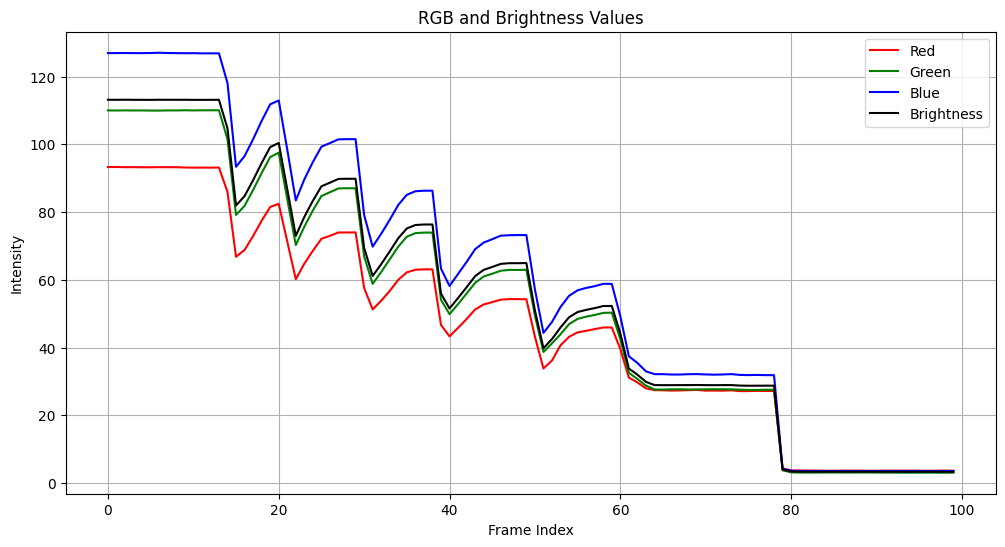

In [49]:
def process_video(video_path, num_frames):
    video = cv2.VideoCapture('./data/light_intensity/garmin.mp4')
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_indices = np.linspace(0, total_frames - 1, num_frames, dtype=int)
    
    rgb_values = []
    brightness_values = []
    
    for idx in frames_indices:
        video.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = video.read()
        if not ret:
            continue
        
        # Convert frame to grayscale for brightness calculation
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Calculate average brightness
        brightness = np.mean(gray_frame)
        brightness_values.append(brightness)
        
        # Calculate RGB values
        r, g, b = frame[:,:,0], frame[:,:,1], frame[:,:,2]
        avg_r = np.mean(r)
        avg_g = np.mean(g)
        avg_b = np.mean(b)
        rgb_values.append((avg_r, avg_g, avg_b))
    
    video.release()
    
    return rgb_values, brightness_values

def plot_graphs(rgb_values, brightness_values):
    num_frames = len(rgb_values)
    indices = np.arange(num_frames)
    
    # Plot RGB values and brightness on the same plot
    plt.figure(figsize=(12, 6))
    
    # Plot RGB values
    plt.plot(indices, np.array(rgb_values)[:,0], color='red', label='Red')
    plt.plot(indices, np.array(rgb_values)[:,1], color='green', label='Green')
    plt.plot(indices, np.array(rgb_values)[:,2], color='blue', label='Blue')
    
    # Plot brightness
    plt.plot(indices, brightness_values, color='black', label='Brightness')
    
    plt.title('RGB and Brightness Values')
    plt.xlabel('Frame Index')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
video_path = './data/light_intensity/garmin.mp4'
num_frames = 100  # Number of frames to process

rgb_values, brightness_values = process_video(video_path, num_frames)
plot_graphs(rgb_values, brightness_values)

In [50]:
np.save("garmin_rgb.npy", np.array(rgb_values))
np.save("garmin_brightness.npy", np.array(brightness_values))

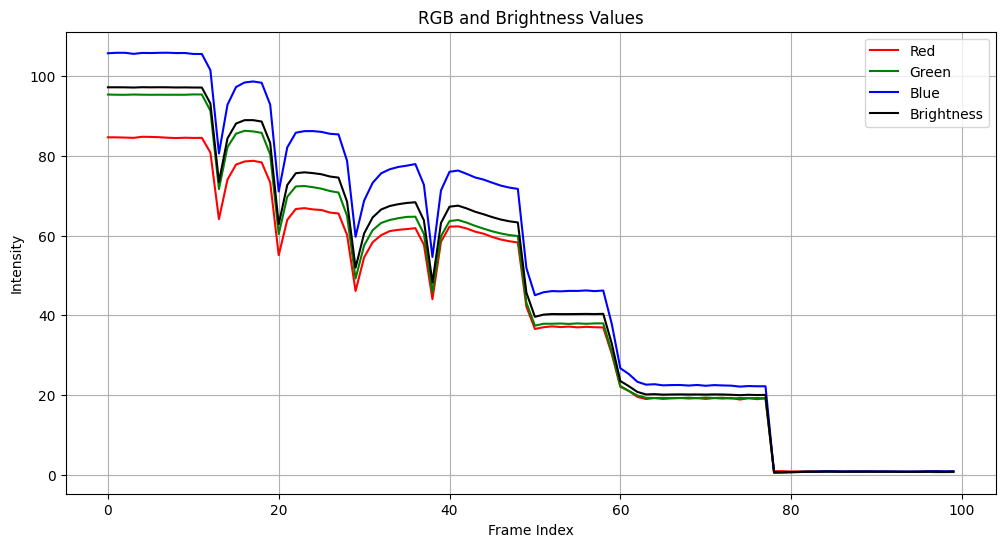

In [51]:
def process_video(video_path, num_frames):
    video = cv2.VideoCapture('./data/light_intensity/gopro.mp4')
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_indices = np.linspace(0, total_frames - 1, num_frames, dtype=int)
    
    rgb_values = []
    brightness_values = []
    
    for idx in frames_indices:
        video.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = video.read()
        if not ret:
            continue
        
        # Convert frame to grayscale for brightness calculation
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Calculate average brightness
        brightness = np.mean(gray_frame)
        brightness_values.append(brightness)
        
        # Calculate RGB values
        r, g, b = frame[:,:,0], frame[:,:,1], frame[:,:,2]
        avg_r = np.mean(r)
        avg_g = np.mean(g)
        avg_b = np.mean(b)
        rgb_values.append((avg_r, avg_g, avg_b))
    
    video.release()
    
    return rgb_values, brightness_values

def plot_graphs(rgb_values, brightness_values):
    num_frames = len(rgb_values)
    indices = np.arange(num_frames)
    
    # Plot RGB values and brightness on the same plot
    plt.figure(figsize=(12, 6))
    
    # Plot RGB values
    plt.plot(indices, np.array(rgb_values)[:,0], color='red', label='Red')
    plt.plot(indices, np.array(rgb_values)[:,1], color='green', label='Green')
    plt.plot(indices, np.array(rgb_values)[:,2], color='blue', label='Blue')
    
    # Plot brightness
    plt.plot(indices, brightness_values, color='black', label='Brightness')
    
    plt.title('RGB and Brightness Values')
    plt.xlabel('Frame Index')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
video_path = './data/light_intensity/gopro.mp4'
num_frames = 100  # Number of frames to process

rgb_values, brightness_values = process_video(video_path, num_frames)
plot_graphs(rgb_values, brightness_values)

In [52]:
np.save("gopro_rgb.npy", np.array(rgb_values))
np.save("gopro_brightness.npy", np.array(brightness_values))

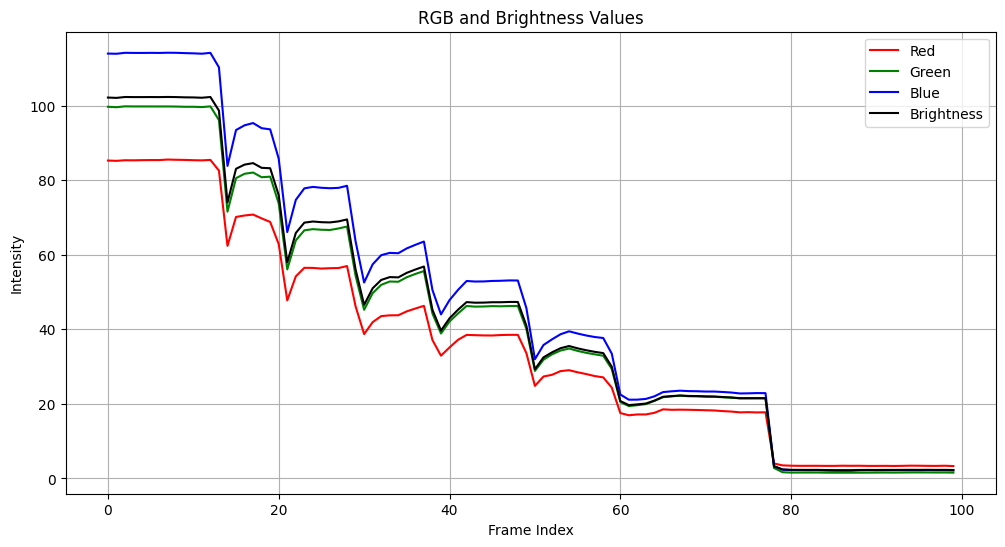

In [53]:
def process_video(video_path, num_frames):
    video = cv2.VideoCapture('./data/light_intensity/insta.mp4')
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_indices = np.linspace(0, total_frames - 1, num_frames, dtype=int)
    
    rgb_values = []
    brightness_values = []
    
    for idx in frames_indices:
        video.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = video.read()
        if not ret:
            continue
        
        # Convert frame to grayscale for brightness calculation
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Calculate average brightness
        brightness = np.mean(gray_frame)
        brightness_values.append(brightness)
        
        # Calculate RGB values
        r, g, b = frame[:,:,0], frame[:,:,1], frame[:,:,2]
        avg_r = np.mean(r)
        avg_g = np.mean(g)
        avg_b = np.mean(b)
        rgb_values.append((avg_r, avg_g, avg_b))
    
    video.release()
    
    return rgb_values, brightness_values

def plot_graphs(rgb_values, brightness_values):
    num_frames = len(rgb_values)
    indices = np.arange(num_frames)
    
    # Plot RGB values and brightness on the same plot
    plt.figure(figsize=(12, 6))
    
    # Plot RGB values
    plt.plot(indices, np.array(rgb_values)[:,0], color='red', label='Red')
    plt.plot(indices, np.array(rgb_values)[:,1], color='green', label='Green')
    plt.plot(indices, np.array(rgb_values)[:,2], color='blue', label='Blue')
    
    # Plot brightness
    plt.plot(indices, brightness_values, color='black', label='Brightness')
    
    plt.title('RGB and Brightness Values')
    plt.xlabel('Frame Index')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
video_path = './data/light_intensity/insta.mp4'
num_frames = 100  # Number of frames to process

rgb_values, brightness_values = process_video(video_path, num_frames)
plot_graphs(rgb_values, brightness_values)

In [54]:
np.save("insta_rgb.npy", np.array(rgb_values))
np.save("insta_brightness.npy", np.array(brightness_values))